# TODO: resolver todo con el algotirmo evolutivo
# FSE - analisys

### library importation, constant definition and data loading from files

The next cell defines the imports nedeed to execute the notebook

In [1]:
import pandas as pd
#!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
%pylab inline
from math import sin, cos, sqrt, atan2, radians
pd.set_option('precision', 2)
from functools import reduce
import os
from operator import truediv
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np


Populating the interactive namespace from numpy and matplotlib


The next cell defines the contanst used by the procedures bellow


In [2]:
#solutions_dir = '/home/jmurana/code/jmetal-notebook'
solutions_dir = '/home/jmurana/code/jMetal/jmetal-fse'

instances_dir = '/home/jmurana/code/jMetal/jmetal-fse/instances/v1/'

run heuristics

In [3]:
ins = "/home/jmurana/code/jMetal/jmetal-fse/instances/v1/ins.txt"
w = "/home/jmurana/code/jMetal/jmetal-fse/instances/v1/w.txt"
ref = "/home/jmurana/code/jMetal/jmetal-fse/instances/v1/ref.txt"
to_null = ""
to_null += "> null"

! sh run-heuristics.sh $ins $w $ref $to_null

run ae

In [4]:
ins = "/home/jmurana/code/jMetal/jmetal-fse/instances/v1/ins.txt"
w = "/home/jmurana/code/jMetal/jmetal-fse/instances/v1/w.txt"
ref = "/home/jmurana/code/jMetal/jmetal-fse/instances/v1/ref.txt"
to_null = ""
to_null += "> null"

! sh run-ae.sh $ins $w $ref $to_null

2019-11-19 19:45:45.458 INFO: Loggers configured with null [org.uma.jmetal.util.JMetalLogger configureLoggers]
2019-11-19 19:45:45.463 INFO: Total execution time: 57780ms [org.uma.jmetal.runner.multiobjective.NSGAIIDRASv1Runner main]
2019-11-19 19:45:45.466 INFO: Random seed: 1574203487672 [org.uma.jmetal.runner.multiobjective.NSGAIIDRASv1Runner printFinalSolutionSet]
2019-11-19 19:45:45.467 INFO: Objectives values have been written to file FUN.tsv [org.uma.jmetal.runner.multiobjective.NSGAIIDRASv1Runner printFinalSolutionSet]
2019-11-19 19:45:45.467 INFO: Variables values have been written to file VAR.tsv [org.uma.jmetal.runner.multiobjective.NSGAIIDRASv1Runner printFinalSolutionSet]


## PLOT pareto

NSGAIIDRASv1_FUN.tsv


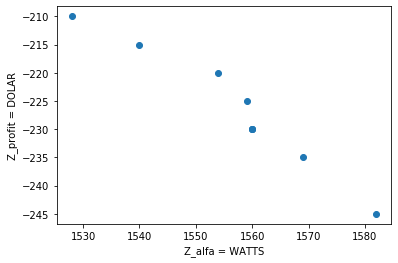

,Z_alfa,Z_profit
0,1560.0,-230.0
1,1582.0,-245.0
2,1528.0,-210.0
3,1560.0,-230.0
4,1554.0,-220.0
5,1559.0,-225.0
6,1540.0,-215.0
7,1560.0,-230.0
8,1569.0,-235.0


In [5]:
data = pd.DataFrame()
for filename in [f for f in os.listdir(solutions_dir +'/') if "FUN.tsv" in f]:
    print(filename)
    data = pd.read_csv(solutions_dir+'/'+filename, header=None,sep=' ',skiprows=0,usecols=[0, 1] )
    data = data.dropna(axis=1, how='all')

data.columns = [['Z_alfa', 'Z_profit']] 
data.Z_alfa = -1 * data.Z_alfa
data.Z_profit = -1 * data.Z_profit

ax = plt.figure().add_subplot(111)
ax.scatter(data.Z_alfa, data.Z_profit)
ax.set_xlabel('Z_alfa = WATTS')
ax.set_ylabel('Z_profit = DOLAR')
plt.show()
data




## PLOT Intervals

In [6]:
#data = pd.DataFrame()

#for filename in [f for f in os.listdir(solutions_dir +'/') if "VAR" in f]:
#    data = pd.read_csv(solutions_dir+'/'+filename, header=None,sep=' ',skiprows=0 )
#    data = data.dropna(axis=1, how='all')

#data_ref = pd.DataFrame()
#for filename in [f for f in os.listdir(instances_dir +'/') if "ref" in f]:
#    data_ref = pd.read_csv(instances_dir+'/'+filename, header=None,sep=' ',skiprows=0 )
#    data = data.dropna(axis=1, how='all')
#data_ref = data_ref.T
#data_ref.columns = [['REF']]  
    
#cantidadRacks = 9
#ax = data.T.groupby(data.T.index // cantidadRacks).sum().plot(figsize=(20,5))
#data_ref.plot(ax=ax)
#ax.set_xlabel('intervalos')
#ax.set_ylabel('WATTS')

## PLOT servers

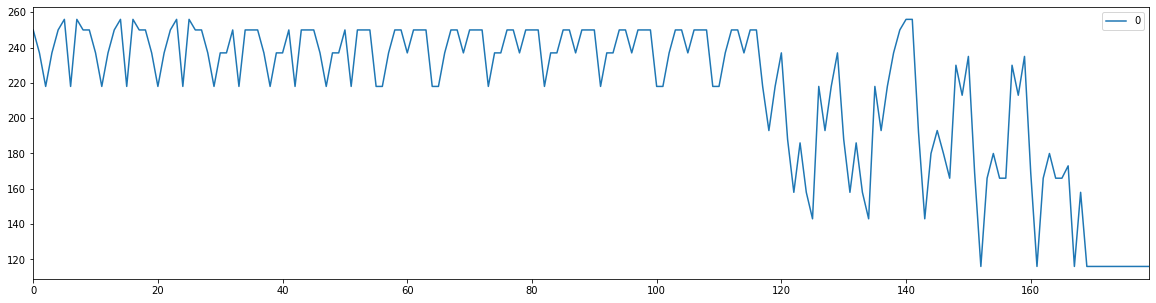

In [7]:
data = pd.DataFrame()

for filename in [f for f in os.listdir(solutions_dir +'/') if "VAR" in f]:
    data = pd.read_csv(solutions_dir+'/'+filename, header=None,sep=' ',skiprows=0 )
    data = data.dropna(axis=1, how='all')
ax = data.T.plot(figsize=(20,5))


## PLOT server zero, one and two

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,250,237,218,237,250,256,218,256,250,250,...,116,116,116,116,116,116,116,116,116,116


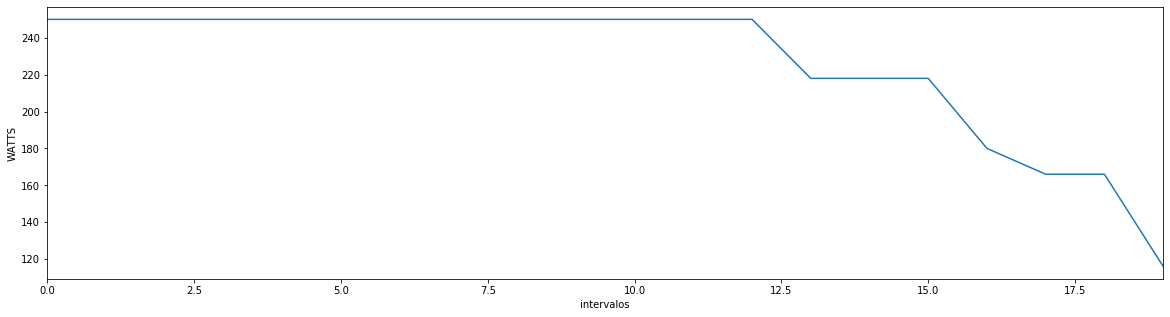

In [8]:
data = pd.DataFrame()

for filename in [f for f in os.listdir(solutions_dir +'/') if "VAR" in f]:
    data = pd.read_csv(solutions_dir+'/'+filename, header=None,sep=' ')
     # drop the columns where all elements are NaN:
    data = data.dropna(axis=1, how='all')
    
serversNumber = 9
intervalsNumber = 20
ax = data.T[0][0::serversNumber].reset_index(drop=True).plot(figsize=(20,5))
#data.T[1][0::serversNumber].reset_index(drop=True).plot(figsize=(20,5))
#data.T[2][0::serversNumber].reset_index(drop=True).plot(figsize=(20,5))
ax.set_xlabel('intervalos')
ax.set_ylabel('WATTS')
data

read results

,alpha,profit,heuristic
0,190.0,-853.0,DRASv1_FUN_RR_ID
1,210.0,-853.0,DRASv1_FUN_RR_AT
2,190.0,-821.0,DRASv1_FUN_FF_ID
3,210.0,-821.0,DRASv1_FUN_FF_AT
4,1560.0,-230.0,NSGAIIDRASv1_FUN.tsv
5,1582.0,-245.0,NSGAIIDRASv1_FUN.tsv
6,1528.0,-210.0,NSGAIIDRASv1_FUN.tsv
7,1560.0,-230.0,NSGAIIDRASv1_FUN.tsv
8,1554.0,-220.0,NSGAIIDRASv1_FUN.tsv
9,1559.0,-225.0,NSGAIIDRASv1_FUN.tsv


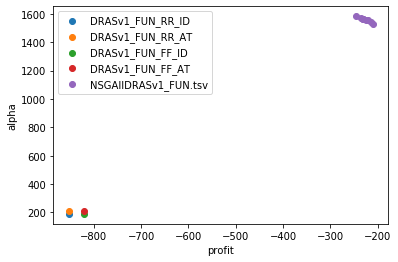

In [9]:
data = pd.DataFrame()
heuristics = []
  

for filename in [f for f in os.listdir(solutions_dir +'/') if "FUN" in f]:
    data1 = pd.read_csv(solutions_dir+'/'+filename, header=None,sep=' ')
     # drop the columns where all elements are NaN:
    data1 = data1.dropna(axis=1, how='all')

    data1['heuristic'] = filename 
    data = pd.concat([data, data1],ignore_index=True)

data.columns = ['alpha','profit','heuristic']
data.profit = -1 * data.profit
data.alpha = -1 * data.alpha
ax = plt.figure().add_subplot(111)
li = list(dict.fromkeys(data['heuristic'].tolist()))
for h in li:
    datax = data[data['heuristic'].str.contains(h)]
    ax.scatter(datax.profit, datax.alpha,label=h)
    ax.legend()
data
ax.set_xlabel('profit')
ax.set_ylabel('alpha')
data


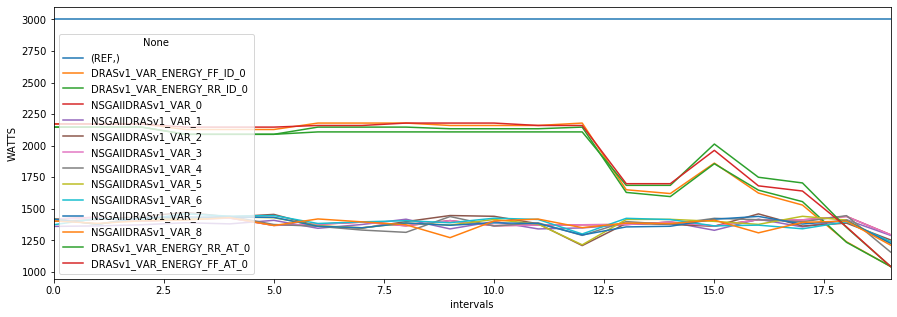

In [10]:
#TODO: read this value
cantidadRacks = 9
data = pd.DataFrame()
heuristics = []
ax = plt.figure().add_subplot(111)
ax.set_xlabel('intervals')
ax.set_ylabel('WATTS')

data_ref = pd.DataFrame()
for filename in [f for f in os.listdir(instances_dir +'/') if "ref" in f]:
    data_ref = pd.read_csv(instances_dir+'/'+filename, header=None,sep=' ',skiprows=0 )
data_ref = data_ref.T
data_ref.columns = [['REF']]  
data_ref.plot(ax=ax)


for filename in [f for f in os.listdir(solutions_dir +'/') if "VAR" in f]:
    data1 = pd.read_csv(solutions_dir+'/'+filename, header=None,sep=' ')
    # drop the columns where all elements are NaN:
    data1 = data1.dropna(axis=1, how='all')   
    data1 = data1.T.groupby(data1.T.index // cantidadRacks).sum() 
    data1.columns = [ filename + '_'+ str(col) for col in data1.columns]
    ax = data1.plot(figsize=(15,5),ax=ax)


Text(0, 0.5, 'REDUCTION (W)')

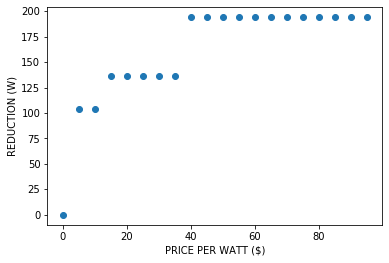

In [27]:
pareto = '/home/jmurana/code/jMetal/dras-controller/extras/example2.pareto'
data = pd.read_csv(pareto, header=None,sep=' ',skiprows=0 )
#data = data.dropna(axis=1, how='all')
data.columns = ['REDUCTION','PRICE']
data

ax = plt.figure().add_subplot(111)
ax.scatter(data.PRICE,data.REDUCTION)
ax.set_xlabel('PRICE PER WATT ($)')
ax.set_ylabel('REDUCTION (W)')

